In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [3]:
eda1=pd.read_csv('./Data-EDA/steam_games_EDA.csv.gz',compression='gzip')

In [4]:
eda1

,genres,app_name,specs,price,id,developer,año
0,Strategy,Lost summoner kitty,Single-player,4.99,761140.0,Kotoshiro,2018
1,Action,Lost summoner kitty,Single-player,4.99,761140.0,Kotoshiro,2018
2,Indie,Lost summoner kitty,Single-player,4.99,761140.0,Kotoshiro,2018
3,Casual,Lost summoner kitty,Single-player,4.99,761140.0,Kotoshiro,2018
4,Simulation,Lost summoner kitty,Single-player,4.99,761140.0,Kotoshiro,2018
...,...,...,...,...,...,...,...
784882,VR,Maze run vr,HTC Vive,4.99,681550.0,Otros,2016
784883,VR,Maze run vr,Oculus Rift,4.99,681550.0,Otros,2016
784884,VR,Maze run vr,Tracked Motion Controllers,4.99,681550.0,Otros,2016
784885,VR,Maze run vr,Standing,4.99,681550.0,Otros,2016


In [5]:
#Agrupamos la columna género por nombre del juego

agrupado_por_generos = eda1.groupby('genres')['app_name']
print(agrupado_por_generos)


In [6]:
df = pd.DataFrame(agrupado_por_generos)

In [7]:
df

,0,1
0,"""1990s""",671 Carmageddon max pack 672 ...
1,"""Beat em up""",1952 Devil may cry® 3 speci...
2,"""Shoot Em Up""",7910 Beat hazard 7911 Beat haz...
3,1980s,5368 Indiana jones® and the last crusade™...
4,2.5D,2053 Ultimate doom 20...
...,...,...
334,World War I,7515 Necrovision: lost company 7516 ...
335,World War II,2159 Wolfenstein 3d 2160 ...
336,Wrestling,210893 Total extreme wrestling 323156 F...
337,Zombies,2003 Final doom 2004 ...


In [8]:
#Renombramos las columnas

df.columns = ['generos', 'juegos']

In [9]:
df

,generos,juegos
0,"""1990s""",671 Carmageddon max pack 672 ...
1,"""Beat em up""",1952 Devil may cry® 3 speci...
2,"""Shoot Em Up""",7910 Beat hazard 7911 Beat haz...
3,1980s,5368 Indiana jones® and the last crusade™...
4,2.5D,2053 Ultimate doom 20...
...,...,...
334,World War I,7515 Necrovision: lost company 7516 ...
335,World War II,2159 Wolfenstein 3d 2160 ...
336,Wrestling,210893 Total extreme wrestling 323156 F...
337,Zombies,2003 Final doom 2004 ...


In [10]:
#Realizamos una nueva columna llamada cantidad de juegos por género

df['cantidad_juegos_por_genero'] = df['generos'].map(agrupado_por_generos.apply(len))

In [11]:
#Nos quedamos solamente con aquellos que tengan más de 2000 juegos

df=df[df['cantidad_juegos_por_genero']>2000]

In [12]:
df

,generos,juegos,cantidad_juegos_por_genero
2,"""Shoot Em Up""",7910 Beat hazard 7911 Beat haz...,2739
5,2D,89 Ironbound 9...,8965
10,4 Player Local,5577 Bionic commando: rearmed 5578 B...,2096
14,Action,1 Lost summoner kitty 168 ...,66002
17,Adventure,169 ...,40444
...,...,...,...
293,Third Person,209 Battle royale trainer 210 Batt...,2783
308,Turn-Based,47 Ironbound 48 ...,4050
318,VR,531 After life vr 532 After life v...,12687
322,Violent,1270 Darkness and a crowd 1271 Dar...,2519


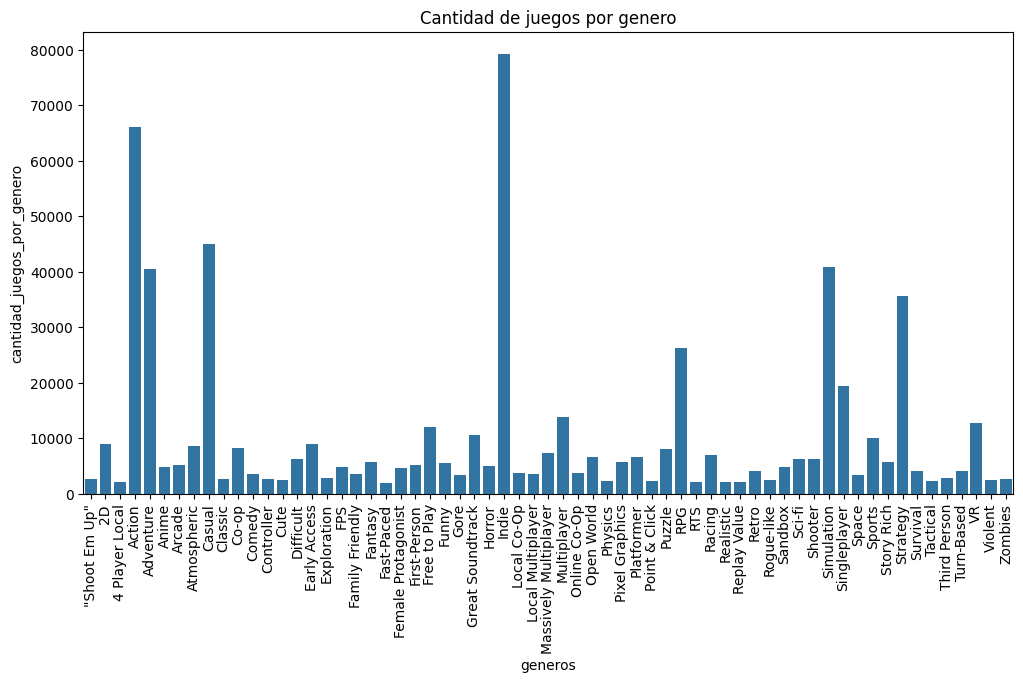

In [13]:
#Se realiza gráfico para visualizar los géneros que tienen más cantidad de juegos

plt.figure(figsize=(12, 6)) 
sns.barplot(data=df, x='generos', y='cantidad_juegos_por_genero')
plt.title('Cantidad de juegos por genero')
plt.xticks(rotation=90)
plt.show()

Top 5 de cantidad de juegos por género

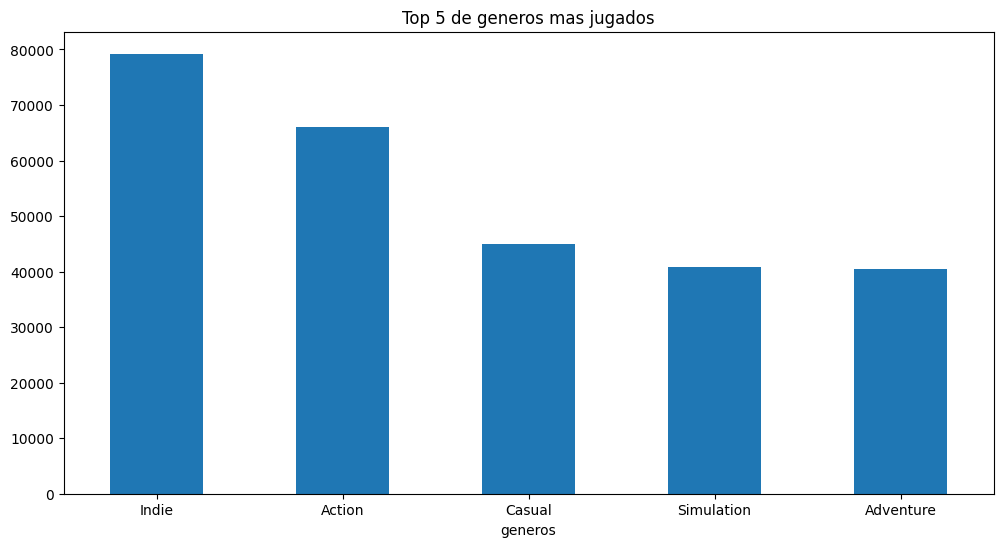

In [14]:
#Se realiza el mismo gráfico anterior pero visualizando solamente el top 5


df = df.groupby('generos').sum()['cantidad_juegos_por_genero'].sort_values(ascending=False).head(5)

# Graficamos
plt.figure(figsize=(12, 6)) 
df.plot(kind='bar')
plt.title('Top 5 de generos mas jugados')
plt.xticks(rotation=0)
plt.show()


Podemos observar que los géneros Indie, Action, Casual Generos, Simulation y Adventure son los que más cantidad de juegos tienen

Cantidad de Juegos lanzados por año

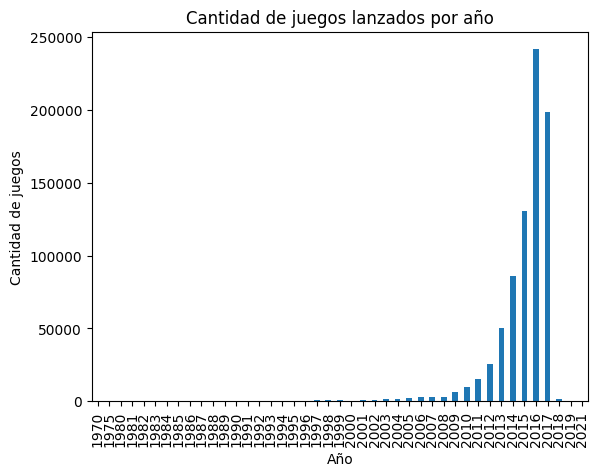

In [15]:
#Se realiza gráfico para visualizar los años con más cantidad de juegos lanzados

juegosPorAño = eda1['año'].value_counts().sort_index()
juegosPorAño.plot(kind='bar')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=90)
plt.show()

Podemos observar que en el año 2016 se lanzó la mayor cantidad de juegos, seguido por el año 2017 y luego el 2015

Top 5 de juegos con el precio más elevado

In [16]:
# Agrupamos los nombres de los juegos con el precio 
juegoMasJugado = eda1[['app_name','price']].groupby('app_name').sum()
# Agarramos el top 5
juegoMasJugado = juegoMasJugado['price'].sort_values(ascending=False).head(5)

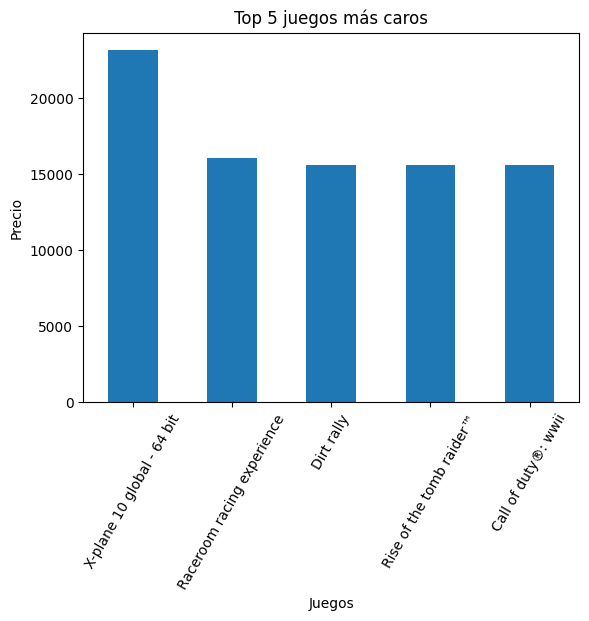

In [17]:
# Creamos el grafico para visualizar los juegos con el precio más elevado
juegoMasJugado.plot(kind='bar')
plt.title('Top 5 juegos más caros')
plt.xlabel('Juegos')
plt.ylabel('Precio')
plt.xticks(rotation=60)
plt.show()

In [18]:
juegoMascaro = eda1[['app_name','price']].groupby('app_name').sum().reset_index()


In [19]:
juegoMascaro

,app_name,price
0,! that bastard is trying to steal our gold !,83.79000
1,"""barely attuned magic thingy"" staff",309.18189
2,"""butts: the vr experience""",23.76000
3,"""glow ball"" - the billiard puzzle game",59.88000
4,"""just another day"" - seduce me otome cd",19.96000
...,...,...
31280,（尘沙惑设定集）lost in secular love - concept design ...,63.84000
31281,４人打ちアクション麻雀 / action mahjong,279.72000
31282,＜/reality＞,959.20000
31283,＜/reality＞ original soundtrack,15.96000


Text(0, 0.5, 'Número de juegos')

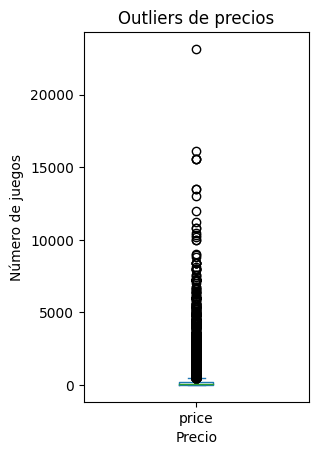

In [20]:
#Realizamos gráfico para visualizar outliers en relación a los precios de los juegos

plt.subplot(1,2,2)
juegoMascaro['price'].plot.box()
plt.title('Outliers de precios')
plt.xlabel('Precio')
plt.ylabel('Número de juegos')


Podemos observar que el la mayoría de los precios de los juegos se encuentran por debajo de los 1000 USD

Top 5 de Usuarios con más horas jugadas

In [21]:
user=pd.read_csv('../Data/Data-Funciones/F_user_genre.csv.gz', compression='gzip')

In [22]:
user

,genres,año,user_id,playtime_forever
0,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",2000,doctr,1
1,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",2000,corrupted_soul,1
2,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",2000,WeiEDKrSat,5
3,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",2000,death-hunter,104
4,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",2000,Fr0stedLine,9
...,...,...,...,...
2022223,"['Action', 'Indie', 'Multiplayer', 'Funny', 'A...",2016,2spookis,1
2022224,"['Action', 'Indie', 'Multiplayer', 'Funny', 'A...",2016,76561198068423082,1
2022225,"['Action', 'Indie', 'Multiplayer', 'Funny', 'A...",2016,jandango,1
2022226,"['Casual', 'Simulation', 'Indie', 'Strategy']",2016,mayshowganmore,2


In [23]:
#Nos quedamos solamente con las columnas de user_id y playtime_forever

user=user[['user_id', 'playtime_forever']]

In [24]:
#Encontramos los primeros 5 usuarios con mayor cantidad de horas jugadas

user= user['playtime_forever'].sort_values(ascending=False).head(5)

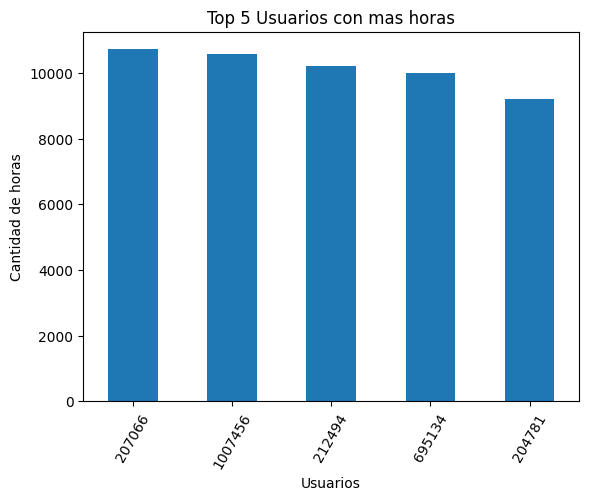

In [25]:
# Creamos el grafico
user.plot(kind='bar')
plt.title('Top 5 Usuarios con mas horas')
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de horas')
plt.xticks(rotation=60)
plt.show()

Top 5 de juegos con más cantidad de horas jugadas

In [27]:
steam5 = pd.read_csv('../Data\Data-Limpia\steam_games_limpio.csv.gz', compression='gzip')

In [28]:
items5 = pd.read_csv('../Data/Data-Limpia/user_items_limpio.csv.gz', compression='gzip')

In [29]:
#Realizamos un merge de los dos DF anteriores 

juegos = pd.merge(items5, steam5, left_on='item_name', right_on='app_name', how='inner')

In [30]:
#Eliminamos las columnas que no vamos a utilizar

juegos = juegos.drop(columns=['item_id', 'item_name', 'user_id','genres','año' ,'id'], axis=1)

In [31]:
#Convertimos el tipo de dato de la columna 'playtime_forever' a entero

juegos['playtime_forever'] = juegos['playtime_forever'].astype(int)

In [36]:
juegos

,playtime_forever,app_name
0,78,Day of defeat: source
1,3,Day of defeat: source
2,1,Day of defeat: source
3,18,Day of defeat: source
4,5,Day of defeat: source
...,...,...
1580948,40,World of leaders
1580949,1240,Elastrix
1580950,2,Chaostower
1580951,4,Sunken


In [50]:
# Sacamos la cantidad de horas que se jugó por juego del dataframe
juegoMasJugado = juegos[['app_name','playtime_forever']].groupby('app_name').sum()
# Agarramos el top 5
juegoMasJugado = juegoMasJugado['playtime_forever'].sort_values(ascending=False).head(5)

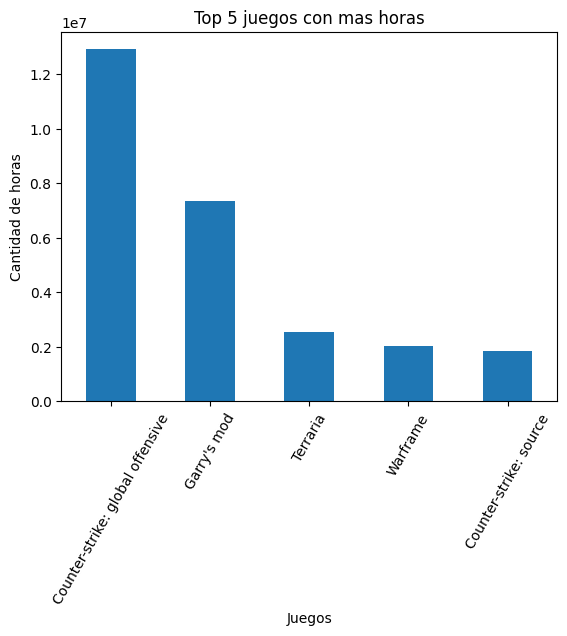

In [92]:
# Creamos el grafico
juegoMasJugado.plot(kind='bar')
plt.title('Top 5 juegos con mas horas')
plt.xlabel('Juegos')
plt.ylabel('Cantidad de horas')
plt.xticks(rotation=60)
plt.show()

Podemos observar que el juego con más cantidad de horas jugadas es el Counter-Strike:global offensive

Cantidad de juegos por Desarrollador

In [104]:
eda1

,genres,app_name,specs,price,id,developer,año
0,Strategy,Lost summoner kitty,Single-player,4.99,761140.0,Kotoshiro,2018
1,Action,Lost summoner kitty,Single-player,4.99,761140.0,Kotoshiro,2018
2,Indie,Lost summoner kitty,Single-player,4.99,761140.0,Kotoshiro,2018
3,Casual,Lost summoner kitty,Single-player,4.99,761140.0,Kotoshiro,2018
4,Simulation,Lost summoner kitty,Single-player,4.99,761140.0,Kotoshiro,2018
...,...,...,...,...,...,...,...
784882,VR,Maze run vr,HTC Vive,4.99,681550.0,Otros,2016
784883,VR,Maze run vr,Oculus Rift,4.99,681550.0,Otros,2016
784884,VR,Maze run vr,Tracked Motion Controllers,4.99,681550.0,Otros,2016
784885,VR,Maze run vr,Standing,4.99,681550.0,Otros,2016


In [105]:
#Agrupamos la columna de desarrollador por nombre de juego

conteo_por_desarrollador = eda1.groupby('developer')['app_name'].count()


In [106]:
# Se obtiene el top 5 de desarrolladores con la mayor cantidad de juegos
top5_desarrolladores = conteo_por_desarrollador.nlargest(5)


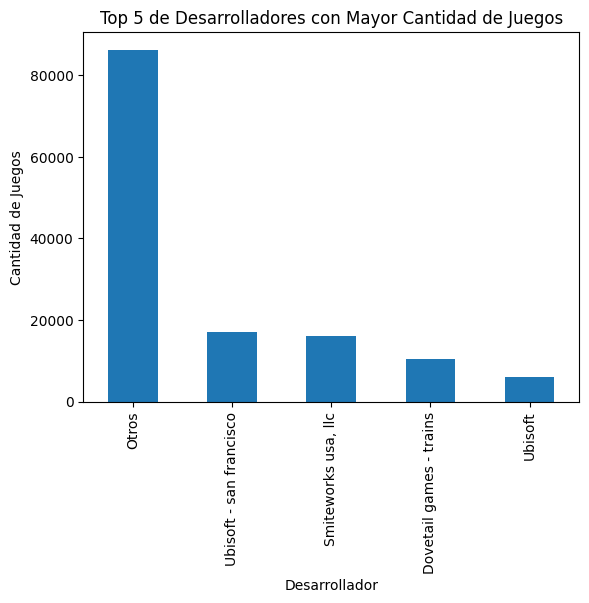

In [115]:
# Se crea un gráfico de barras para el top 5
top5_desarrolladores.plot(kind='bar')

plt.title('Top 5 de Desarrolladores con Mayor Cantidad de Juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos')

# Mostrar el gráfico
plt.show()

Reseñas

In [109]:
resenias = pd.read_csv('../Data/Data-Funciones/Funciones2.csv.gz',compression='gzip')

In [110]:
resenias

,user_id,recommend,sentiment_analysis,app_name,genres,año
0,76561197970982479,True,2,Killing floor,"['FPS', 'Zombies', 'Co-op', 'Survival', 'Actio...",2009
1,death-hunter,True,2,Killing floor,"['FPS', 'Zombies', 'Co-op', 'Survival', 'Actio...",2009
2,DJKamBer,True,0,Killing floor,"['FPS', 'Zombies', 'Co-op', 'Survival', 'Actio...",2009
3,diego9031,True,1,Killing floor,"['FPS', 'Zombies', 'Co-op', 'Survival', 'Actio...",2009
4,76561198081962345,True,1,Killing floor,"['FPS', 'Zombies', 'Co-op', 'Survival', 'Actio...",2009
...,...,...,...,...,...,...
53046,llDracuwulf,True,1,Asteria,"['Indie', 'Adventure', 'Action', 'Platformer',...",2014
53047,ChrisCoroner,True,2,Street fighter x tekken,"['Fighting', 'Action', 'Arcade', '2D Fighter',...",2012
53048,MeloncraftLP,True,1,The journey down: chapter one,"['Adventure', 'Point & Click', 'Indie', 'Comed...",2013
53049,MeloncraftLP,True,1,The journey down: chapter two,"['Adventure', 'Indie', 'Point & Click', 'Great...",2014


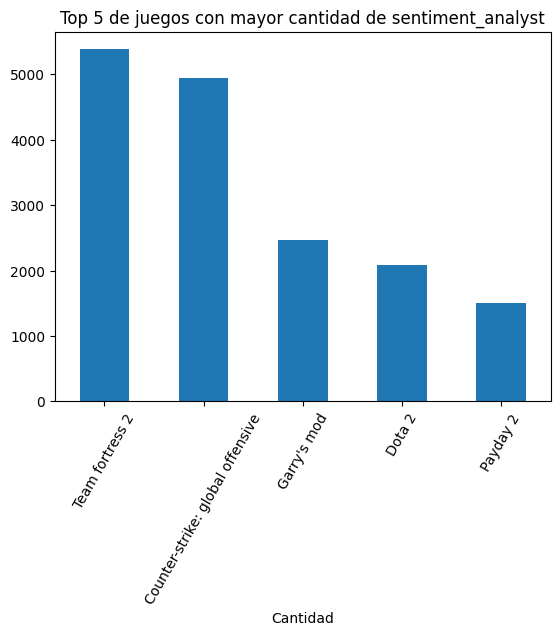

In [111]:
#Se agrupa nombre de juegos por análisis de sentimientos y luego se realiza un gráfico

juegosAnalysis = resenias[['app_name', 'sentiment_analysis']].groupby('app_name')['sentiment_analysis'].sum().sort_values(ascending=False).head(5)
juegosAnalysis.plot(kind='bar')
juegosAnalysis
plt.title('Top 5 de juegos con mayor cantidad de sentiment_analyst')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

Top 5 de juegos más recomendados

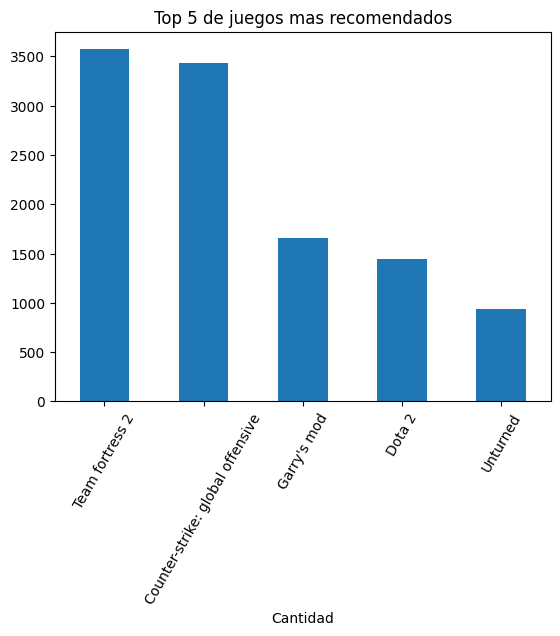

In [112]:
#Se agrupa nombre de juego por recomendaciones y luego se ordenan para tener solo el top 5 

juegosRecomend = resenias[['app_name', 'recommend']].groupby('app_name')['recommend'].sum().sort_values(ascending=False).head(5)
juegosRecomend.plot(kind='bar')
plt.title('Top 5 de juegos mas recomendados')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

Se puede observa que el juego Team Fortress 2 tiene mayor cantidad de recomendaciones

Cantidad de Recomendaciones

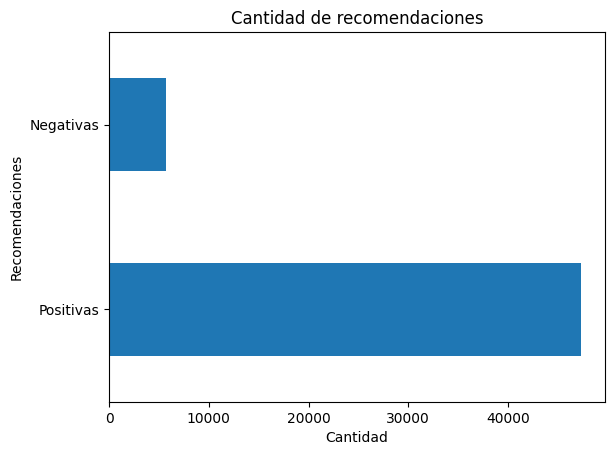

In [114]:
#Se cuenta la cantidad de recomendaciones y se realiza gráfico

resenias['recommend'].value_counts().plot(kind='barh')
plt.title('Cantidad de recomendaciones')
plt.xlabel('Cantidad')
plt.ylabel('Recomendaciones')
plt.yticks(ticks=[0,1],labels=['Positivas','Negativas'])
plt.show()

Se puede observar que hay una mayor cantidad de recomendaciones positivas que negativas